### No need for normalization, near_match solves the alignment.
#### Simple example, only *fille* / *file* was not correctly aligned. 

## 0. Normal

In [13]:
from collatex import *
collation = Collation()
W1 = open( "data/example7/W1.txt", encoding='utf-8' ).read()
W2 = open( "data/example7/W2.txt", encoding='utf-8' ).read()
W3 = open( "data/example7/W3.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "W1", W1 )
collation.add_plain_witness( "W2", W2 )
collation.add_plain_witness( "W3", W3 )
table = collate(collation, output='html2', segmentation=False)
print(table)

None


Da notare che *fille* vs *file* viene allineato quando segmentation="True". 

## 1. Near match

In [14]:
from collatex import *
collation = Collation()
W1 = open( "data/example7/W1.txt", encoding='utf-8' ).read()
W2 = open( "data/example7/W2.txt", encoding='utf-8' ).read()
W3 = open( "data/example7/W3.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "W1", W1 )
collation.add_plain_witness( "W2", W2 )
collation.add_plain_witness( "W3", W3 )
table = collate(collation, output='html2', near_match=True, segmentation=False)
print(table)

None



## 2a. Dictionary (table)

This method requires the manual creation of a dictionary, with original and normalized words. The dictionary here includes terms for all the example, so there is no need to change it from one example to the other.

In [15]:
import csv
import re

#create the dictionary (here: Dictionary.csv consisting in two columns, separated by a comma. The first Column 'Original' are the strings as found in the text, the second column 'Normalised' contains the strings you want to replace them with. No whitespaces behind the strings.) 
Normit = {}
with open('dictionary.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'],  dialect='excel')
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()
#da lettere
#testimone_P4 = open( "lettere/T196-part1-clean-P4.txt", encoding='utf-8' ).read()
#testimone_S2 = open( "lettere/T196-part1-clean-S2.txt", encoding='utf-8' ).read()
#testimone_S4 = open( "lettere/T196-part1-clean-S4.txt", encoding='utf-8' ).read()

# build a function to tokenize and to normalize by replace keys to be found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_W1 = tokennormalizer(W1) 
tokens_W2 = tokennormalizer(W2) 
tokens_W3 = tokennormalizer(W3) 

witness_W1 = { "id": "W1", "tokens":tokens_W1 }
witness_W2 = { "id": "W2", "tokens":tokens_W2 }
witness_W3 = { "id": "W3", "tokens":tokens_W3 }


input = { "witnesses": [ witness_W1, witness_W2, witness_W3 ] }

table = collate(input, output='html2', segmentation=False)

## 2a. Dictionary  (graph)

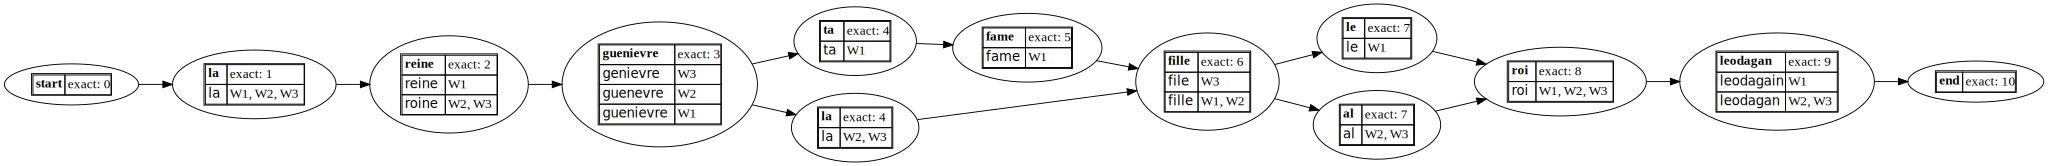

In [16]:
import csv
import re

#create the dictionary (here: Dictionary.csv consisting in two columns, separated by a comma. The first Column 'Original' are the strings as found in the text, the second column 'Normalised' contains the strings you want to replace them with. No whitespaces behind the strings.) 
Normit = {}
with open('dictionary.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'],  dialect='excel')
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()
#da lettere
#testimone_P4 = open( "lettere/T196-part1-clean-P4.txt", encoding='utf-8' ).read()
#testimone_S2 = open( "lettere/T196-part1-clean-S2.txt", encoding='utf-8' ).read()
#testimone_S4 = open( "lettere/T196-part1-clean-S4.txt", encoding='utf-8' ).read()

# build a function to tokenize and to normalize by replace keys to be found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_W1 = tokennormalizer(W1) 
tokens_W2 = tokennormalizer(W2) 
tokens_W3 = tokennormalizer(W3) 

witness_W1 = { "id": "W1", "tokens":tokens_W1 }
witness_W2 = { "id": "W2", "tokens":tokens_W2 }
witness_W3 = { "id": "W3", "tokens":tokens_W3 }


input = { "witnesses": [ witness_W1, witness_W2, witness_W3 ] }

table = collate(input, output='svg', segmentation=False)

## 2b. NLP (table)

This method requires the dictionary 'pos_lemma.csv' ('pos_lemma_example7.csv'), that can be created using the notebook ['Create_dictionary_using_NLP'](create_dictionary_using_NLP.ipynb).

#### The results would be better if case folding normalization is applied before, see for example *Grant* vs *Grans* vs *grant*.

In [17]:
import csv
import re

Normit = {}
with open('pos_lemma_example7.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'],  dialect='excel')
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()
#da lettere
#testimone_P4 = open( "lettere/T196-part1-clean-P4.txt", encoding='utf-8' ).read()
#testimone_S2 = open( "lettere/T196-part1-clean-S2.txt", encoding='utf-8' ).read()
#testimone_S4 = open( "lettere/T196-part1-clean-S4.txt", encoding='utf-8' ).read()

# build a function to tokenize and to normalize by replace keys to be found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_W1 = tokennormalizer(W1) 
tokens_W2 = tokennormalizer(W2) 
tokens_W3 = tokennormalizer(W3)

witness_W1 = { "id": "W1", "tokens":tokens_W1 }
witness_W2 = { "id": "W2", "tokens":tokens_W2 }
witness_W3 = { "id": "W3", "tokens":tokens_W3 }


input = { "witnesses": [ witness_W1, witness_W2, witness_W3 ] }

table = collate(input, output='html2', segmentation=False)
print(table)

None


## 2b. NLP (graph)

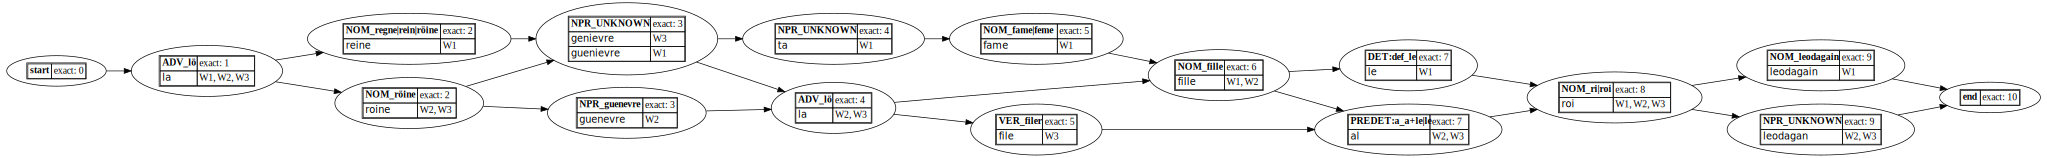

None


In [18]:
import csv
import re

Normit = {}
with open('pos_lemma_example7.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'],  dialect='excel')
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()
#da lettere
#testimone_P4 = open( "lettere/T196-part1-clean-P4.txt", encoding='utf-8' ).read()
#testimone_S2 = open( "lettere/T196-part1-clean-S2.txt", encoding='utf-8' ).read()
#testimone_S4 = open( "lettere/T196-part1-clean-S4.txt", encoding='utf-8' ).read()

# build a function to tokenize and to normalize by replace keys to be found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_W1 = tokennormalizer(W1) 
tokens_W2 = tokennormalizer(W2) 
tokens_W3 = tokennormalizer(W3) 

witness_W1 = { "id": "W1", "tokens":tokens_W1 }
witness_W2 = { "id": "W2", "tokens":tokens_W2 }
witness_W3 = { "id": "W3", "tokens":tokens_W3 }


input = { "witnesses": [ witness_W1, witness_W2, witness_W3 ] }

table = collate(input, output='svg', segmentation=False)
print(table)